In [1]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

2024-03-21 11:42:18.051416: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 11:42:18.730460: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-03-21 11:42:18.730504: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-03-21 11:42:18.730510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [13]:
link = "Resultados/ResultadoCompletoOldCategories/V1W10"
linkGuardadoDecoder = link

archivoData = "PredictionsConvolutionLSTM_forecast_60_180_EspacioLatente_w10.npy"
linkDecodificador = link+"/Decoder.h5"


In [14]:
data = np.load(link+"/"+archivoData)
#data = data/255.
print("data" , link+archivoData)
print("data shape",data.shape)

data Resultados/ResultadoCompletoOldCategories/V1W10PredictionsConvolutionLSTM_forecast_60_180_EspacioLatente_w10.npy
data shape (374, 9, 60, 180, 1)


<Figure size 2000x2000 with 0 Axes>

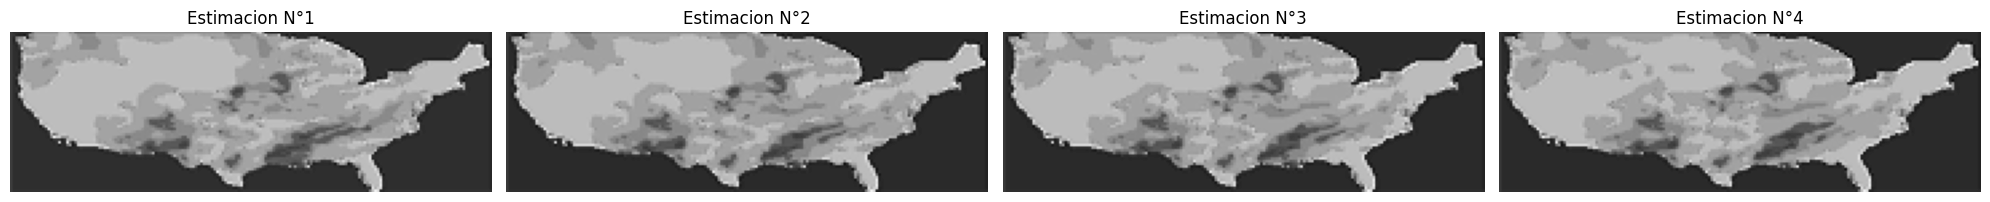

In [15]:
fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 373
horizon = 4

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(data[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()

In [16]:
# carga del decodor 
decoder = keras.models.load_model(linkDecodificador)
print (decoder.summary())

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 180, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 180, 8)        80        
                                                                 
 up_sampling2d (UpSampling2D  (None, 120, 360, 8)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 360, 1)       73        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
decorderData = decoder.predict(data[pos])

results = np.zeros((374, 4, 120, 360, 1))

for i in range(data.shape[0]):
    # Selecciona los últimos 4 marcos de cada muestra
    last_4_frames = data[i, -4:, :, :, :]
    #datas255 = data[i, :, :, :, :]
    # Realiza la predicción utilizando los últimos 4 marcos
    result = decoder.predict(last_4_frames)
    
    # Guarda el resultado en el arreglo de resultados
    results[i] = result
    print("result N°",i, "shape", result.shape)


#guardar resultado
np.save(linkGuardadoDecoder+"/resultadosDecoder.npy", results)

1/1 [==============================] - 0s 20ms/step
result N° 0 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 18ms/step
result N° 1 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 2 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 3 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 4 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 18ms/step
result N° 5 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 6 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 7 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 8 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 18ms/step
result N° 9 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 10 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 

In [18]:
print("decorderData shape",results.shape)

decorderData shape (374, 4, 120, 360, 1)


In [19]:
np.save(linkGuardadoDecoder+"/ResultadosEstimacionDecodificacionSinCategorico.npy", results)

<Figure size 2000x2000 with 0 Axes>

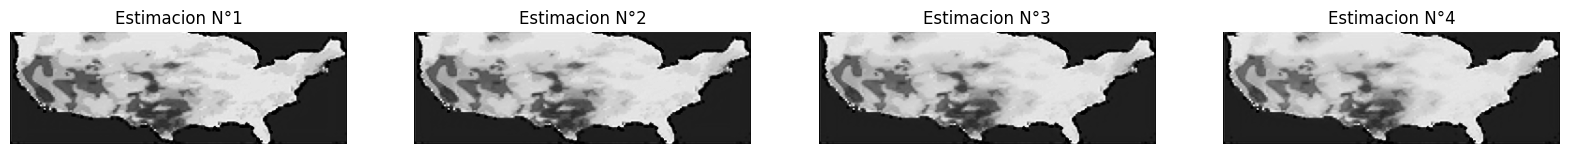

In [20]:


fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 300

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(results[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1

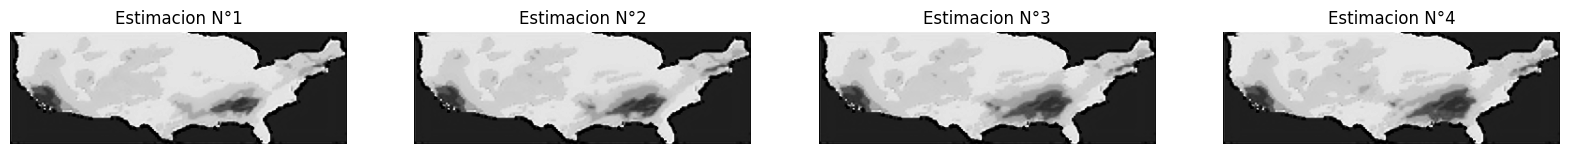

In [21]:
#show ech decoded image
fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(results[i][0], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1

posicion 300


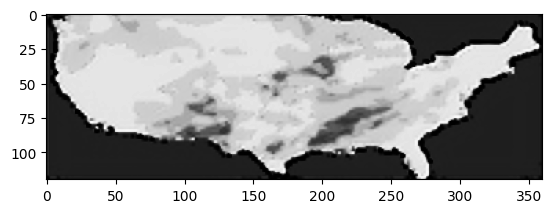

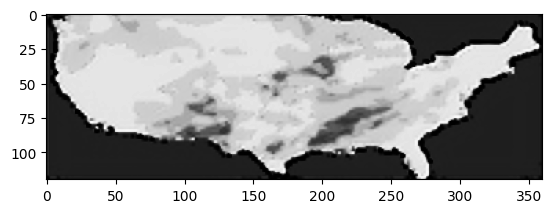

In [22]:
#mostrar la primer imagen
print("posicion", pos)
plt.imshow(decorderData[5], cmap='gray')
plt.show()
plt.imshow(result[0], cmap='gray')
plt.show()

In [23]:
valoresUnicos = np.unique(results[0])
print("valoresUnicos",valoresUnicos)
print("leng val",len(valoresUnicos))
print("max",np.max(results[0]))
print("min",np.min(results[0]))

valoresUnicos [8.48299486e-11 1.04329691e-10 1.05345489e-10 ... 9.89378512e-01
 9.89822626e-01 9.90343928e-01]
leng val 161779
max 0.9903439283370972
min 8.482994862113458e-11
